In [104]:
import pandas as pd
youtube_comments = pd.read_csv('data/youtube_comments.csv', encoding='CP949')
youtube_comments

,x
0,"그러게요, 노노상속이 그렇게 형편없군요. 인생이 그렇게 가면 덧없는 걸."
1,"돈은 쪼개서 살수 있지만, 외로움은 쪼개서 살 수 없다는 말이 굉장히 슬프네요. 모..."
2,아니 빌라한개 남은거 은행에 주택연금으로 사시지 그걸 손주준다고 왜 힘들게 사셔ㅠ ...
3,안락 존엄사 합법화 해라. 비참하게 연명하는 것보다 편안하게 눈 감는게 존엄이다. ...
4,슬프네요 자식에 올인하지마세요 그자식은 또다른 인격체입니다
...,...
420,좌비에스는 무조건 거른다.
421,게으르니 거지처럼 살지
422,우리남쪽에국민들도.이렇게고생하시며.하우하루를살아가고개시는데.이런분들은나몰라라하고.북...
423,이용만 당하다가 버려진거지. 그래도 자기가 밥먹고 사는게 박정희 덕분이라고 생각하는...


In [105]:
len(youtube_comments)

425

In [106]:
import re
import nltk
from konlpy.tag import Okt; t= Okt()

In [107]:
stopwords = pd.read_csv('data/stopwords_ko.txt', sep='|')
stopwords

,가
0,가까스로
1,가령
2,각
3,각각
4,각자
...,...
589,휘익
590,휴
591,흐흐
592,흥


In [108]:
def read_data(filename):
    with open(filename, 'r',encoding='utf-8') as f: #데이터 f 함수를 이용하여 불러오기
        data = [line.split('\t') for line in f.read().splitlines()] 
        #f 함수를 이용하여 먼저 줄별로 split한 데이터를 반복문을 통해서 띄어쓰기를 구분자로 split한 것을 리스트로 반환
    
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data
    
L = read_data('data/stopwords_ko.txt')
stopwords = [item for sublist in L for item in sublist]
print (stopwords)

['가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '된이상', '두번째로', '둘', '둥둥', '뒤따라', '뒤이어', '든간

In [109]:
def read_data(filename):
    with open(filename, 'r',encoding='utf-8') as f: #데이터 f 함수를 이용하여 불러오기
        data = [line.split('\t') for line in f.read().splitlines()] 
        #f 함수를 이용하여 먼저 줄별로 split한 데이터를 반복문을 통해서 띄어쓰기를 구분자로 split한 것을 리스트로 반환
    
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data
    
L = read_data('data/stopwords.txt')
stopwords2 = [item for sublist in L for item in sublist]
print (stopwords2)

['휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어

In [110]:
X_train = []
for sentence in youtube_comments['x']:
    sentence = re.sub('([a-zA-Z])','',sentence)
    sentence = re.sub('[ㄱ-ㅎㅏ-ㅣ]+','',sentence)
    sentence = re.sub(r'[0-9]+', '', sentence)
    sentence = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',sentence)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    sentence = hangul.sub('', sentence)
    temp_X = t.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    temp_X = [word for word in temp_X if not word in stopwords2]
    X_train.append(temp_X)

In [111]:
X_train = [item for sublist in X_train for item in sublist]
print (X_train)

['그렇다', '노노', '상속', '그렇게', '형편', '없다', '인생', '그렇게', '가면', '덧', '없다', '걸', '돈', '은', '쪼개다', '살수', '외로움', '은', '쪼개다', '살', '수', '없다', '말', '굉장하다', '슬프다', '열심히', '사다', '말년', '다', '들다', '이르다', '요', '부모', '도', '생각나다', '미래', '도', '걱정', '되다', '나라', '지원이', '분', '에게도', '골고루', '돌아가다', '하다', '아니다', '빌라', '한개', '남다', '은행', '주택연금', '사시', '지', '그걸', '손주', '주다', '힘들다', '사다', '노후', '준비', '안', '하다', '아니다', '자식', '손주', '다주', '는', '게', '문제', '안락', '존엄사', '합법', '화', '해', '라', '비참하다', '연명', '하다', '보다', '편안하다', '눈', '감다', '존엄', '이다', '나다', '그리다', '되다', '원하다', '슬프다', '자식', '올인', '하다', '말다', '자식', '은', '또다른', '인격', '체', '이다', '돈', '은', '행복', '조건', '아니다', '빈곤', '은', '불행', '시작', '이다', '생활', '지', '원금', '보단', '독거', '노인', '모으다', '복지', '기숙사', '운영', '하다', '세금', '덜', '사용', '되다', '삶', '질', '올라가다', '끝', '삶', '끈', '놓치다', '않다', '힘드다', '상황', '에서도', '자격증', '공부', '하다', '마음', '너무', '아프다', '고인', '명복', '비다', '죽음', '은', '다오', '는', '거', '죽음', '은', '두렵다', '않다', '살다', '허무하다', '의미', '없이', '느끼다', '더', '두렵다', '돈', '없이', '애', '낳다', '죄

In [112]:
ko = nltk.Text(X_train)
ko.vocab().most_common(100)

[('하다', 389),
 ('은', 182),
 ('자식', 144),
 ('도', 118),
 ('는', 115),
 ('없다', 113),
 ('되다', 102),
 ('살다', 90),
 ('돈', 84),
 ('다', 73),
 ('아니다', 72),
 ('노인', 70),
 ('노후', 67),
 ('사람', 64),
 ('보다', 59),
 ('이다', 59),
 ('한', 53),
 ('않다', 49),
 ('안', 48),
 ('내', 46),
 ('젊다', 43),
 ('고', 41),
 ('살', 39),
 ('생각', 38),
 ('못', 38),
 ('하고', 38),
 ('부모', 37),
 ('인생', 36),
 ('주다', 34),
 ('들다', 33),
 ('게', 33),
 ('요', 32),
 ('문제', 32),
 ('가다', 32),
 ('만', 32),
 ('죽다', 31),
 ('더', 30),
 ('지', 29),
 ('적', 29),
 ('분', 28),
 ('나이', 28),
 ('수', 27),
 ('먹다', 27),
 ('분들', 27),
 ('많다', 27),
 ('면', 27),
 ('지금', 27),
 ('세금', 26),
 ('한테', 26),
 ('너무', 25),
 ('좋다', 25),
 ('세상', 25),
 ('국민', 25),
 ('그렇다', 24),
 ('준비', 24),
 ('아프다', 24),
 ('늙다', 24),
 ('말', 23),
 ('없이', 23),
 ('잘', 23),
 ('집', 23),
 ('삶', 22),
 ('정부', 22),
 ('받다', 22),
 ('나라', 21),
 ('차다', 21),
 ('사회', 21),
 ('슬프다', 20),
 ('미래', 20),
 ('힘들다', 20),
 ('복지', 20),
 ('만원', 20),
 ('남', 20),
 ('인', 20),
 ('자다', 20),
 ('본인', 20),
 ('사다', 19),
 ('만들다', 19),

In [143]:
stop_words1 = ['이','난','서','이랑', '너무', '이렇다', "님", "겁니다", "이제", '어떻다','진짜', '되어다', '분들','안되다', '인', '가장','없이', '많이', '니', '이라도', '임', '세','이나','저렇게', '그냥', '위해','때문', '대','거','뭐', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하','니', '못', '요', '지','하고', '싶다', '더', '그렇다', '한테', '없다', '내', '잘', '거', '처럼','분','게','고','음','며','데','만','도','면', '않다', '이고','라','안', '인데', '다','보다', '아니다', '한','이다','하다', '은', '가',  '도','고','만','게', '되다', '를', '수',  '면', '는', '이','도' ]

In [144]:
token_ko = [each_word for each_word in X_train if each_word not in stop_words1]
ko = nltk.Text(token_ko)
ko.vocab().most_common(100)

[('자식', 144),
 ('살다', 90),
 ('돈', 84),
 ('노인', 70),
 ('노후', 67),
 ('젊다', 43),
 ('살', 39),
 ('생각', 38),
 ('부모', 37),
 ('인생', 36),
 ('주다', 34),
 ('들다', 33),
 ('문제', 32),
 ('가다', 32),
 ('죽다', 31),
 ('적', 29),
 ('나이', 28),
 ('먹다', 27),
 ('많다', 27),
 ('지금', 27),
 ('세금', 26),
 ('좋다', 25),
 ('세상', 25),
 ('국민', 25),
 ('준비', 24),
 ('아프다', 24),
 ('늙다', 24),
 ('집', 23),
 ('삶', 22),
 ('정부', 22),
 ('받다', 22),
 ('나라', 21),
 ('차다', 21),
 ('사회', 21),
 ('슬프다', 20),
 ('미래', 20),
 ('힘들다', 20),
 ('복지', 20),
 ('만원', 20),
 ('남', 20),
 ('자다', 20),
 ('본인', 20),
 ('사다', 19),
 ('만들다', 19),
 ('빈곤', 18),
 ('낳다', 18),
 ('국가', 18),
 ('크다', 17),
 ('열심히', 16),
 ('모으다', 16),
 ('마음', 16),
 ('알다', 16),
 ('말고', 15),
 ('인간', 15),
 ('말다', 14),
 ('죽음', 14),
 ('행복하다', 14),
 ('연금', 14),
 ('쓰다', 14),
 ('고독사', 14),
 ('부모님', 14),
 ('모르다', 13),
 ('고독', 13),
 ('대다', 13),
 ('지원', 13),
 ('걱정', 12),
 ('오다', 12),
 ('현실', 12),
 ('가난하다', 12),
 ('내다', 12),
 ('결혼', 12),
 ('위', 12),
 ('힘드다', 11),
 ('한국', 11),
 ('영상', 11),
 ('개인', 11),
 ('지

In [145]:
data = ko.vocab().most_common(100)

In [146]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

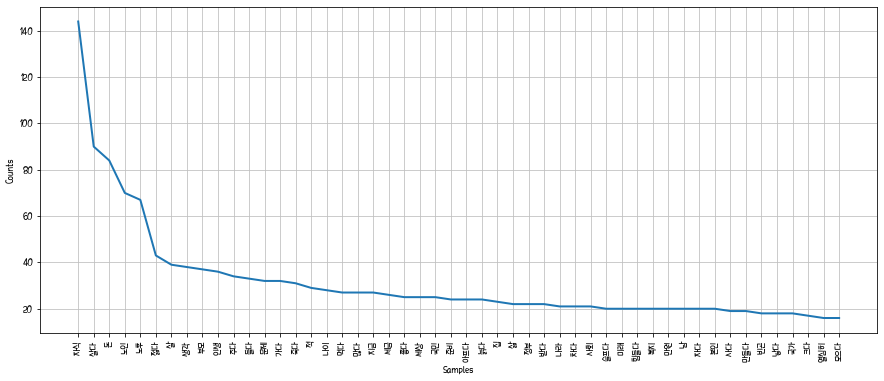

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
#import graphviz
from sklearn.tree import export_graphviz
plt.figure(figsize = (15, 6))
ko.plot(50)
plt.show()

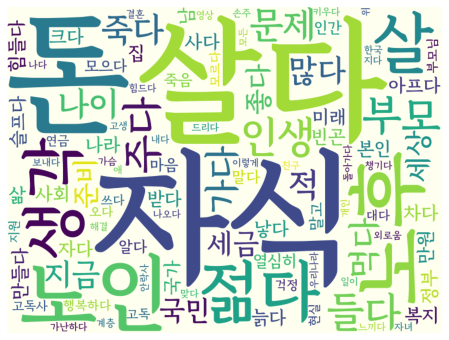

In [149]:
from wordcloud import WordCloud            ## 워드 클라우드 모듈을 사용한다 
import matplotlib.pyplot as plt
myfontpath = "data/경기천년바탕_Bold.ttf" 
wc = WordCloud(font_path=myfontpath,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='ivory', width=800, height=600
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

In [151]:
wc.to_file("output/youtube_wordcloud1.png")